In [1]:
#librerias
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib
import matplotlib.pylab as plt

Paracaidista en un atmosfera no uniforme.
En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

$$
P=P_0 e^{-\frac{Mgy}{kT}}
$$
$P_0=1atm$ es la presión de la atmósfera a nivel del mar
M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
g es la aceleración de la gravedad
$k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
$T$ es la temperatura de la atmósfera en kelvin
$NA=6.0225\times 10^23$ es el número de Avogadro, número de moléculas que caben en un mol.
Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$

Las fuerzas que actuan sobre el paracaidista son: El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:
$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + \frac{A\delta}{2m} \rho v^2 
$$$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + k_0v^2 exp(-y/\lambda)
$$
donde $k_0=\frac{\rho_0A\delta}{2m}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

Elaborar una gráfica de la densidad como función de la altura.
Diseñar un programa que resuelva la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros:
* $m=60kg$, $A=0.3m^2$, $h=30km$.
* $m=60kg$, $A=0.3m^2$, $h=40km$.
* $m=60kg$, $A=0.3m^2$, $h=50km$.
* $m=60kg$, $A=0.3m^2$, $h=60km$.
* $m=60kg$, $A=0.3m^2$, $h=70km$.

Con la solucion de la ecuacion diferencial, elaborar una gráfica de.
* la posición como función del tiempo.
* La velocidad como función del tiempo.
* La velocidad como función de la posición

Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:
http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html

Realice un grafico de la velocidad maxima como función de la altura de caida.






Elaborar una gráfica de la densidad como función de la altura.

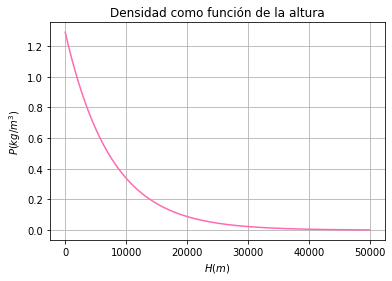

In [2]:
#definir variables
p0=1#atm
M=0.0288#kg/mol
g=9.8#m/s**2
k=1.3805e-23 #J/K
T=254 #k
NA=6.0225e23#numero de avogadro
lamda=7482.2 #m
p_0=1.29#kg/m**3
#para el paracaidista
m = 60 #kg
A = 0.3 #m^2 
δ = 0.5 #valor arbitrario   



y=np.linspace(0,50000,1000)#grilla de evaluacion
#construccion de la funcion
def P(y):
  p=p_0*(np.e**((-y*g*M)/(NA*T*k)))
  return p
#graficacion
plt.figure()
plt.xlabel("$H(m)$")
plt.ylabel("$P(kg/m^3)$")
plt.title("Densidad como función de la altura")
plt.plot(y, P(y), color="hotpink")
plt.grid()



Diseñar un programa que resuelva la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros:

In [3]:
#parte del reposo
v_0 = 0 
#condiciones iniciales
h_1 = np.array([30000, v_0]) 
h_2 = np.array([40000, v_0]) 
h_3 = np.array([50000, v_0]) 
h_4 = np.array([60000, v_0]) 
h_5 = np.array([70000, v_0]) 
#ecuacion de k_0
k_0 = p_0*A*δ/(2*m)
# funcion para retornar las derivadas en la ecuacion diferencial
def paracaidas(x, t, parametros):
    m =  parametros[0]
    k_0 = parametros[2]
    g =  parametros[1]
    lamda =  parametros[3]  
    dxdt = x[1]
    dvdt =  -g +k_0*(x[1]**2)*np.exp(-x[0]/lamda) 
    return [dxdt, dvdt]
parametros = [m, g, k_0,lamda ]
#grilla de evaluacion
t = np.linspace(0,280,1000) 
#resolviendo la ecuacion diferencial
y_1 = odeint(paracaidas, h_1, t, args=(parametros, ) )  
y_2 = odeint(paracaidas, h_2, t, args=(parametros, ) )  
y_3 = odeint(paracaidas, h_3, t, args=(parametros, ) )  
y_4 = odeint(paracaidas, h_4, t, args=(parametros, ) )  
y_5 = odeint(paracaidas, h_5, t, args=(parametros, ) )
#posicion 
x_1 = y_1[:,0]#en 30km
x_2 = y_2[:,0]#en 40km
x_3 = y_3[:,0]#en 50km
x_4 = y_4[:,0]#en 60km
x_5 = y_5[:,0]#en 70km
#velocidad
v_1 = y_1[:,1]#en 30km
v_2 = y_2[:,1]#en 40km
v_3 = y_3[:,1]#en 50km
v_4 = y_4[:,1]#en 60km
v_5 = y_5[:,1]#en 70km



Con la solucion de la ecuacion diferencial, elaborar una gráfica de.

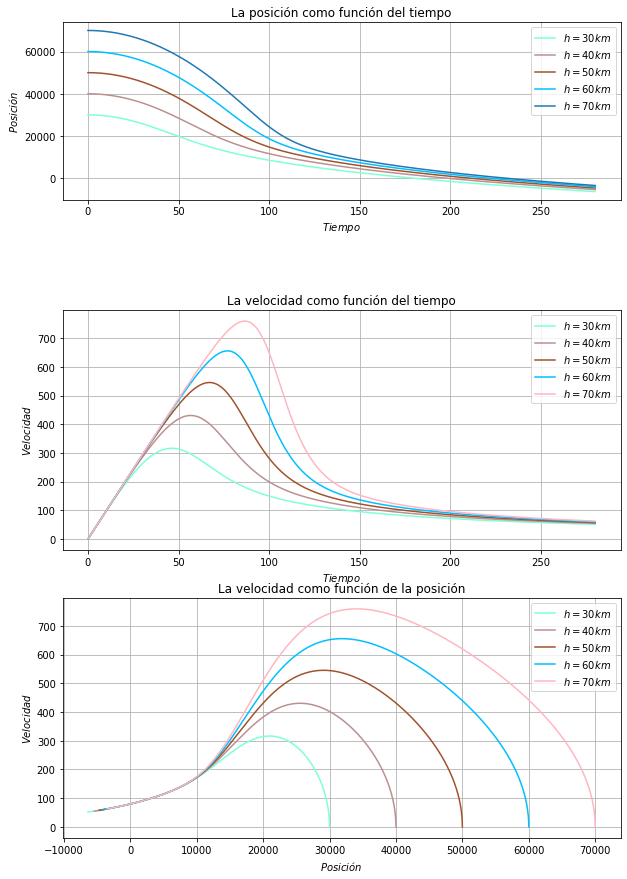

In [4]:

fig = plt.figure(figsize=(10,15))

plt.subplot(4,1,1)
#la posición como función del tiempo
plt.title("La posición como función del tiempo")
plt.plot(t,x_1, label="$h=30km$", color="aquamarine")
plt.plot(t,x_2, label="$h=40km$", color="rosybrown" )
plt.plot(t,x_3, label="$h=50km$", color="sienna")
plt.plot(t,x_4, label="$h=60km$", color="deepskyblue")
plt.plot(t,x_5, label="$h=70km$")
plt.xlabel("$Tiempo $")
plt.ylabel("$Posición $")
plt.grid()
plt.legend()

plt.subplot(3,1,2)
#la posición como función del tiempo
plt.title("La velocidad como función del tiempo")
plt.plot(t,-v_1, label="$h=30km$", color="aquamarine")
plt.plot(t,-v_2, label="$h=40km$", color="rosybrown")
plt.plot(t,-v_3, label="$h=50km$", color="sienna")
plt.plot(t,-v_4, label="$h=60km$", color="deepskyblue")
plt.plot(t,-v_5, label="$h=70km$", color="lightpink")
plt.xlabel("$Tiempo $")
plt.ylabel("$Velocidad $")
plt.grid()
plt.legend()

plt.subplot(3,1,3)
#La velocidad como función de la posición
plt.title("La velocidad como función de la posición")
plt.plot(x_1,-v_1, label="$h=30km$", color="aquamarine")
plt.plot(x_2,-v_2, label="$h=40km$", color="rosybrown")
plt.plot(x_3,-v_3, label="$h=50km$", color="sienna")
plt.plot(x_4,-v_4, label="$h=60km$", color="deepskyblue")
plt.plot(x_5,-v_5, label="$h=70km$", color="lightpink")
plt.xlabel("$Posición $")
plt.ylabel("$Velocidad $")
plt.grid()
plt.legend()

Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

In [5]:
#hallando la velocidad maxima

max_1=np.max(-v_1)#para h=30km
max_2=np.max(-v_2)#para h=40km
max_3=np.max(-v_3)#para h=50km
max_4=np.max(-v_4)#para h=60km
max_5=np.max(-v_5)#para h=70km
print("La velocidad maxima para h= 30km es: ", max_1)
print("La velocidad maxima para h= 40km es: ", max_2)
print("La velocidad maxima para h= 50km es: ", max_3)
print("La velocidad maxima para h= 60km es: ", max_4)
print("La velocidad maxima para h= 70km es: ", max_5)

La velocidad maxima para h= 30km es:  316.4680253576918
La velocidad maxima para h= 40km es:  430.6444310950656
La velocidad maxima para h= 50km es:  545.5266945107878
La velocidad maxima para h= 60km es:  655.7877993181897
La velocidad maxima para h= 70km es:  759.4847715714849



Realice un grafico de la velocidad maxima como función de la altura de caida.

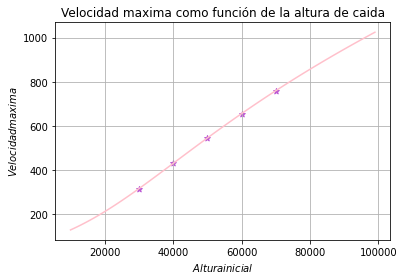

In [6]:
zi=[30000,40000,50000,60000,70000] #valores h de los puntos anteriores
vi=[max_1,max_2,max_3,max_4,max_5]
z = np.arange(10000,100000,1000)#grilla de evaluacion
max = []#arreglo vacio
#para hallar velocidad maxima de caida en funcion de la altura de caida
for i in range(len(z)):
  x=np.array([z[i],v_0])
  y=odeint(paracaidas, x, t, args=(parametros, ) )
  max.append(np.max(-y[:,1]))
#graficando
plt.plot(z,max, color="pink")
plt.title("Velocidad maxima como función de la altura de caida")
plt.xlabel("$Alturainicial$")
plt.ylabel("$Velocidadmaxima$")
plt.scatter(zi,vi, color= "mediumorchid", marker="*")
plt.grid()